In [1]:
import os
import sys
import struct
import pprint
import matplotlib
import matplotlib.pyplot as plt
import pickle
import math
import time
import statistics
import numpy as np
from TraceInc import AutoDict
%pylab inline

type_enum = {
   0 : "Load",
   1 : "Store"
}
pp = pprint.PrettyPrinter(indent=2)

Populating the interactive namespace from numpy and matplotlib


In [2]:
files = ['hs2d', 'hs3d','hist', 'nbody', 'path', 'bfs']

In [8]:
vols = {}
for app in files:
    data = pickle.load( open('../data/'+app+'.vols', "rb"))
    vols[app] = {}
    vols[app]['ldata'] = 0
    vols[app]['sdata'] = 0

    vols[app]['com'] = 0
    for k in data['KDV']:
        for it in data['KDV'][k]:
            vols[app]['sdata'] += data['KDV'][k][it]['Store'] or 0
            vols[app]['ldata'] += data['KDV'][k][it]['Load'] or 0


    for k in data['KCV']:
        for it in data['KCV'][k]:
            vols[app]['com'] += data['KCV'][k][it]['Store'] or 0


ratios = []
lvols = []
svols = []
for app in files:
    ratios.append(vols[app]['com']/vols[app]['sdata'])
    lvols.append(vols[app]['ldata'])
    svols.append(vols[app]['sdata'])

pp.pprint(vols)
pp.pprint(ratios)

{ 'bfs': {'com': 4731015, 'ldata': 117722135, 'sdata': 14653511},
  'hist': {'com': 1118720, 'ldata': 68227584, 'sdata': 1118976},
  'hs2d': {'com': 2300928, 'ldata': 18496000, 'sdata': 5242880},
  'hs3d': {'com': 38494080, 'ldata': 503316480, 'sdata': 83886080},
  'nbody': {'com': 110592, 'ldata': 84131840, 'sdata': 122880},
  'path': {'com': 582336, 'ldata': 45400172, 'sdata': 2000000}}
[ 0.4388671875,
  0.45888519287109375,
  0.9997712194005949,
  0.9,
  0.291168,
  0.3228588015527473]


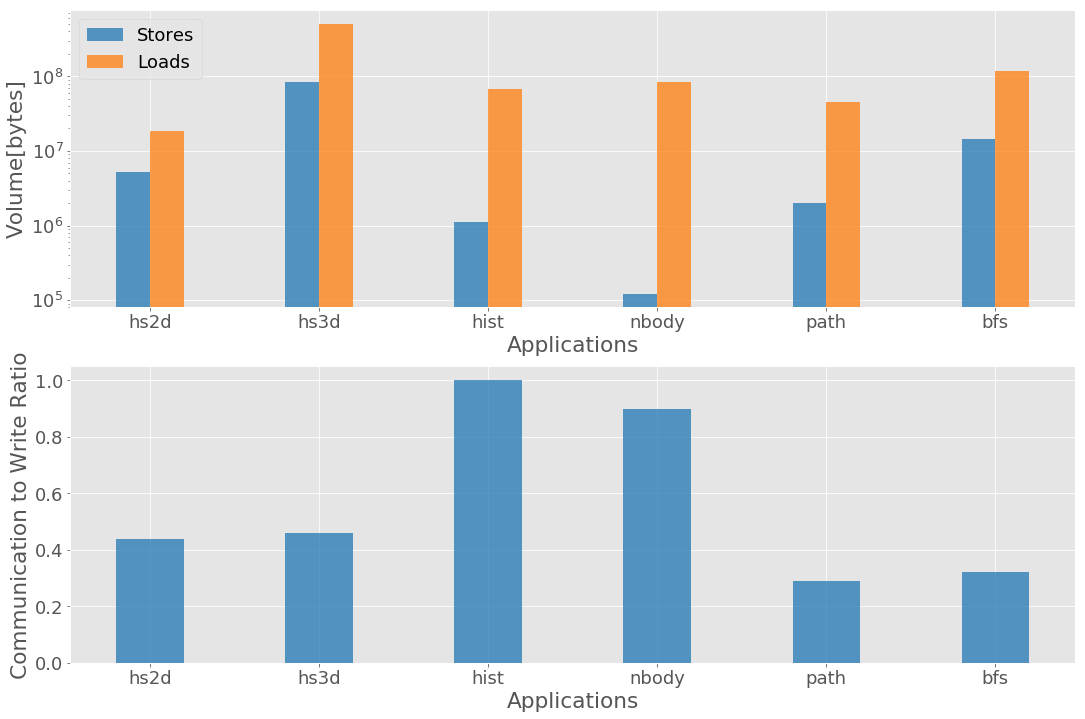

In [13]:
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (18, 12)
matplotlib.rcParams.update({'font.size': 18})

cmap = matplotlib.cm.get_cmap('tab10')
c = cmap.colors
ind = np.arange(len(files))  # the x locations for the groups
plt.subplot(211)
width = 0.2
plt.bar(ind-width/2, svols, alpha=0.75, label='Stores', width=width, color=c[0])
plt.bar(ind+width/2, lvols, alpha=0.75, label='Loads', width=width, color=c[1])

plt.ylabel('Volume[bytes]')
plt.xlabel('Applications')
plt.legend()
plt.yscale('log')
#plt.title('com/data ration (write)')
plt.xticks(ind, files)

width = 0.4  
plt.subplot(212)
plt.bar(ind, ratios, alpha=0.75,width=width, color=c[0])
plt.ylabel('Communication to Write Ratio')
plt.xlabel('Applications')
#plt.title('com/data ration (write)')
plt.xticks(ind, files)

filename = '../plots/write-com-ratio.pdf'
plt.savefig(filename, papertype='a4', bbox_inches='tight', orientation='landscape')
plt.show()